In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
Brain = pd.read_csv("mammals.csv")
Brain = Brain.drop(['Unnamed: 0'], axis=1)
Brain.head(8)

,Animal,Forebr m,Cer m,rest m,Forebr n,Cer n,Rest n,Body m
0,African sheath-tailed bat,0.0899,0.0540,0.098,5080000.0,47984000.0,5514000.0,11.5
1,Little free-tailed bat,0.0840,0.0360,0.084,5632000.0,25324000.0,4001000.0,5.4
2,Rufous trident bat,0.0930,0.0720,0.084,6039000.0,59651000.0,4072000.0,13.7
3,Common bent-wing bat,0.0858,0.0485,0.086,6116000.0,44447000.0,5094000.0,11.6
4,Naked mole-rat,0.1840,0.0480,0.160,6150000.0,15740000.0,4980000.0,35.3
5,Commerson's roundleaf bat,0.2430,0.1070,0.237,7877000.0,51875000.0,6965000.0,101.9
6,Smoky shrew,0.0840,0.0200,0.072,9730000.0,20870000.0,5560000.0,7.5
7,Heart-nosed bat,0.2570,0.1030,0.201,10221000.0,63792000.0,7317000.0,26.0


In [37]:
Brain['Fmr %'] = Brain['Forebr m']/(Brain['Forebr m']+Brain['Cer m']+Brain['rest m'])
Brain['Cmr %'] = Brain['Cer m']/(Brain['Forebr m']+Brain['Cer m']+Brain['rest m'])
Brain['rmr %'] = Brain['rest m']/(Brain['Forebr m']+Brain['Cer m']+Brain['rest m'])
Breng = Brain
Breng.head()

,Animal,Forebr m,Cer m,rest m,Forebr n,Cer n,Rest n,Body m,Fmr %,Cmr %,rmr %
0,African sheath-tailed bat,0.0899,0.0540,0.098,5080000.0,47984000.0,5514000.0,11.5,0.371641,0.223233,0.405126
1,Little free-tailed bat,0.0840,0.0360,0.084,5632000.0,25324000.0,4001000.0,5.4,0.411765,0.176471,0.411765
2,Rufous trident bat,0.0930,0.0720,0.084,6039000.0,59651000.0,4072000.0,13.7,0.373494,0.289157,0.337349
3,Common bent-wing bat,0.0858,0.0485,0.086,6116000.0,44447000.0,5094000.0,11.6,0.389469,0.220154,0.390377
4,Naked mole-rat,0.1840,0.0480,0.160,6150000.0,15740000.0,4980000.0,35.3,0.469388,0.122449,0.408163


In [38]:
Breng.describe()

,Forebr m,Cer m,rest m,Forebr n,Cer n,Rest n,Body m,Fmr %,Cmr %,rmr %
count,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000
mean,113.612976,31.254991,21.333309,7.713805e+08,7.466985e+09,6.534607e+07,1.220254e+05,0.589806,0.140776,0.269418
std,416.957124,158.801420,77.924253,2.343499e+09,3.480849e+10,1.362693e+08,6.531704e+05,0.125387,0.042625,0.103243
min,0.084000,0.020000,0.072000,5.080000e+06,1.574000e+07,4.001000e+06,5.400000e+00,0.371641,0.086622,0.078254
25%,0.437500,0.132500,0.272500,1.641500e+07,8.911250e+07,9.548000e+06,6.365000e+01,0.489618,0.110197,0.175220
50%,2.730000,0.730000,1.386000,6.039000e+07,3.157400e+08,2.247000e+07,5.330000e+02,0.565217,0.136761,0.290676
75%,48.224500,6.190000,8.817000,5.115950e+08,2.147500e+09,6.548500e+07,7.495000e+03,0.694443,0.157668,0.354284
max,2847.000000,1171.000000,564.000000,1.634000e+10,2.507000e+11,7.410000e+08,4.800000e+06,0.819318,0.289157,0.428928


In [34]:
Breng.to_csv('/content/mammals with feature engi-1.csv')

In [39]:
X1 = Breng[["Forebr m", "Cer m", "rest m", "Body m", "Fmr %", "Cmr %", "rmr %"]]
Y1 = Breng["Forebr n"]

In [40]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.25)

In [41]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train1, y_train1)

GradientBoostingRegressor()

In [42]:
mean_squared_error(y_test1, GBR.predict(x_test1))

1.3513946759957707e+17

In [43]:
r2_score(y_test1, GBR.predict(x_test1))

0.5628037082294146

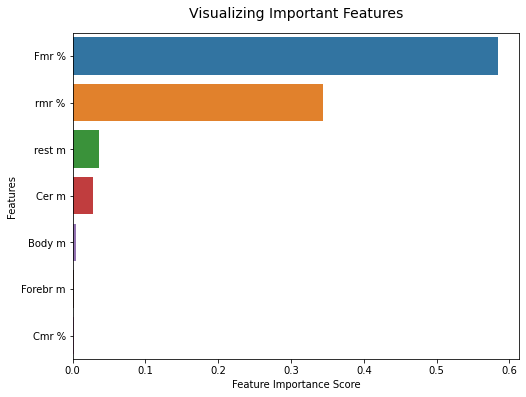

In [44]:
fig = plt.figure(figsize=(8, 6))

feature_imp = pd.Series(GBR.feature_importances_, index=['Forebr m', 'Cer m', 'rest m', 'Body m',
                                                         'Fmr %', 'Cmr %', 'rmr %']).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')

In [45]:
# Human(included in data)
GBR.predict([[1200, 150, 120, 70000, 0.818, 0.102, 0.079]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.63382454e+10])

In [46]:
# Killer whale
GBR.predict([[5270, 753, 192, 3987500, 0.847, 0.121, 0.03]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.57704777e+10])

In [47]:
# Orangutan
GBR.predict([[414, 35, 40, 64475, 0.846, 0.071, 0.081]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.51150358e+10])

In [48]:
# Short-finned pilot whale
GBR.predict([[2431, 403, 91, 2200000, 0.831, 0.137, 0.031]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([1.56447308e+10])

In [49]:
# random
GBR.predict([[20, 4, 6, 2200, 0.666, 0.133, 0.2]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([6.17542605e+08])